In [1]:
import numpy as np      # to work on numerical python 
import pandas as pd     # to work on data manipulation 
import seaborn as sns   # visualization

In [2]:
df = pd.read_csv('Quikr Price Prediction.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.shape

(892, 6)

In [4]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [5]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## checking for duplicates

In [7]:
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type
14,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
15,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
20,Mahindra Scorpio S10,Mahindra,2016,"3,50,000","43,000 kms",Diesel
24,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
25,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
...,...,...,...,...,...,...
626,Tata Sumo Gold EX BS IV,Tata,2012,"2,10,000","75,000 kms",Diesel
641,Maruti Suzuki Swift VDi BS IV,Maruti,2012,"2,80,000","48,006 kms",Diesel
727,Mahindra Scorpio S4,Mahindra,2015,"8,65,000","30,000 kms",Diesel
861,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol


In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type


In [10]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [11]:
df.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [12]:
df.shape

(798, 6)

In [13]:
df = df.reset_index(drop=True)

In [14]:
miss_vals = df.isnull().sum()
miss_vals[miss_vals>0]

kms_driven    50
fuel_type     53
dtype: int64

In [15]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [16]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [17]:
df1 = df.copy(deep=True)

In [18]:
df = df[df.year.str.isnumeric()]

In [19]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [20]:
df.shape

(749, 6)

In [21]:
df['year'] = df.year.astype(int)

In [22]:
type(int('8'))

int

In [23]:
df.dtypes

name          object
company       object
year           int32
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [28]:
for i in df.columns:
    print('\n',i,'\n')
    print(df[i].unique())


 name 

['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Hyundai i20 Sportz 1.2' 'Maruti Suzuki Alto 800 Lx'
 'Maruti Suzuki Vitara Brezza ZDi' 'Maruti Suzuki Alto LX'
 'Mahindra Bolero DI' 'Maruti Suzuki Swift Dzire ZDi'
 'Mahindra Scorpio S10 4WD' 'Maruti Suzuki Swift Vdi BSIII'
 'Maruti Suzuki Wagon R VXi BS III' 'Maruti Suzuki Wagon R VXi Minor'
 'Toyota Innova 2.0 G 8 STR BS IV' 'Renault Lodgy 85 PS RXL'
 'Skoda Yeti Ambition 2.0 TDI CR 4x2' 'Maruti Suzuki Baleno Delta 1.2'
 'Renault Duster 110 PS RxZ Diesel Plus' 'Renault Duster 85 PS RxE Diesel'
 'Honda City 1.5 S MT' 'Maruti

In [24]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

### Price

In [31]:
df[df.Price == 'Ask For Price']

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
51,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
115,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,"28,028 kms",Petrol
236,Maruti Suzuki Swift LDi,Maruti,2010,Ask For Price,"52,000 kms",Diesel
242,Tata Indica eV2 LS,Tata,2017,Ask For Price,"84,000 kms",Diesel
310,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,"24,000 kms",Petrol
368,Maruti Suzuki Zen Estilo LXI Green CNG,Maruti,2011,Ask For Price,"16,000 kms",Petrol
414,Hyundai Xcent Base 1.1 CRDi,Hyundai,2015,Ask For Price,"1,80,000 kms",Diesel
422,Hyundai Xcent S 1.2,Hyundai,2015,Ask For Price,"35,000 kms",Petrol


In [36]:
df.Price.isnull().sum()

22

In [33]:
df['Price'] = df['Price'].replace('Ask For Price',np.nan)

In [43]:
prediction_data = df[df.Price.isnull()]
prediction_data

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,NaN,"22,000 kms",Petrol
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,NaN,"59,000 kms",Diesel
51,I want to sell my car Tata Zest,I,2017,NaN,NaN,NaN
115,Maruti Suzuki Alto 800 Lxi,Maruti,2018,NaN,"28,028 kms",Petrol
236,Maruti Suzuki Swift LDi,Maruti,2010,NaN,"52,000 kms",Diesel
242,Tata Indica eV2 LS,Tata,2017,NaN,"84,000 kms",Diesel
310,Maruti Suzuki Alto 800 Lxi,Maruti,2018,NaN,"24,000 kms",Petrol
368,Maruti Suzuki Zen Estilo LXI Green CNG,Maruti,2011,NaN,"16,000 kms",Petrol
414,Hyundai Xcent Base 1.1 CRDi,Hyundai,2015,NaN,"1,80,000 kms",Diesel
422,Hyundai Xcent S 1.2,Hyundai,2015,NaN,"35,000 kms",Petrol


In [44]:
prediction_data.index

Int64Index([  2,   5,  51, 115, 236, 242, 310, 368, 414, 422, 435, 478, 524,
            530, 544, 671, 730, 734, 756, 762, 767, 788],
           dtype='int64')

In [47]:
df = df.drop(prediction_data.index)

In [48]:
df.shape

(727, 6)

In [53]:
df = df.reset_index(drop=True)

In [54]:
df.tail()

,name,company,year,Price,kms_driven,fuel_type
722,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
723,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
724,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
725,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
726,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [55]:
df.Price.isnull().sum()

0

In [66]:
df['Price'] = df.Price.str.replace(',','').astype('int')

In [67]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
4,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


In [68]:
df.dtypes

name          object
company       object
year           int32
Price          int32
kms_driven    object
fuel_type     object
dtype: object

In [101]:
df2 = df.copy(deep=True)

### kms_driven

In [84]:
type('45,000 kms')

str

In [76]:
int('45,000 kms'.replace(',','').split(' ')[0])

45000

In [104]:
df = df[df.kms_driven.str.isnumeric()]

In [102]:
df['kms_driven'] = [i.replace(',','').split()[0]   for i in df['kms_driven']]

In [106]:
df['kms_driven'] = df.kms_driven.astype('int')

In [109]:
df = df.reset_index(drop=True)

In [110]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [112]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [111]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [113]:
df[df.fuel_type.isnull()]

,name,company,year,Price,kms_driven,fuel_type
106,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [117]:
df['fuel_type'].mode().values

array(['Petrol'], dtype=object)

In [120]:
df['fuel_type'].loc[106] = 'Petrol'

C:\Users\91914\AppData\Local\Temp\ipykernel_2932\4214282391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_type'].loc[106] = 'Petrol'


In [121]:
df['fuel_type'].loc[106]

'Petrol'

In [122]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

<Axes: >

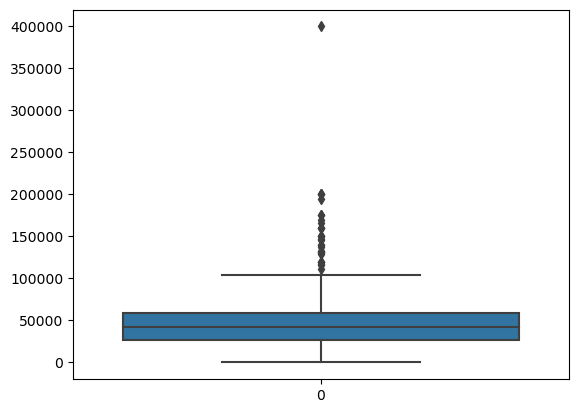

In [123]:
sns.boxplot(df.kms_driven)

In [124]:
df[df.kms_driven > 350000]

,name,company,year,Price,kms_driven,fuel_type
281,Honda City 1.5 V MT Exclusive,Honda,2010,240000,400000,Petrol


In [129]:
df.kms_driven[df.kms_driven == 400000] = 40000

C:\Users\91914\AppData\Local\Temp\ipykernel_2932\3874707074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.kms_driven[df.kms_driven == 400000] = 40000


<Axes: >

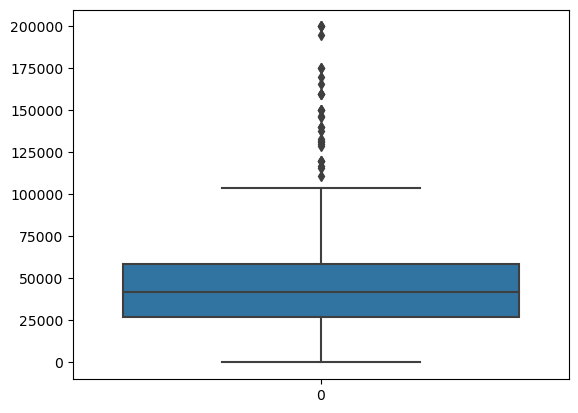

In [130]:
sns.boxplot(df.kms_driven)

In [125]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [126]:
df[df.company == 'Honda']

,name,company,year,Price,kms_driven,fuel_type
34,Honda City 1.5 S MT,Honda,2011,280000,33000,Petrol
36,Honda Amaze,Honda,2013,284999,46000,Diesel
37,Honda Amaze 1.5 SX i DTEC,Honda,2015,345000,36000,Diesel
38,Honda City,Honda,2015,499999,55000,Petrol
44,Honda City ZX CVT,Honda,2017,170000,15000,Diesel
51,Honda City,Honda,2015,448999,54000,Petrol
54,Honda Amaze,Honda,2015,344999,22000,Petrol
61,Honda Brio,Honda,2012,224999,30000,Petrol
67,Honda City 1.5 EXi New,Honda,2005,90000,50000,Petrol
86,Honda Amaze 1.2 S i VTEC,Honda,2014,325000,42000,Petrol


<Axes: >

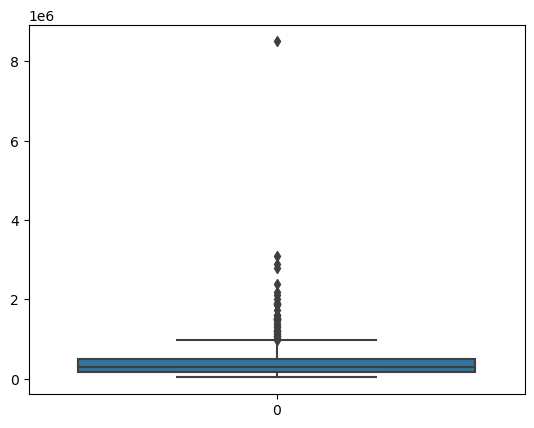

In [131]:
sns.boxplot(df.Price)

In [133]:
df[df.Price > 6000000]

,name,company,year,Price,kms_driven,fuel_type
448,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [135]:
df.Price[df.Price > 6000000] = 850000

C:\Users\91914\AppData\Local\Temp\ipykernel_2932\1772108472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Price[df.Price > 6000000] = 850000


<Axes: >

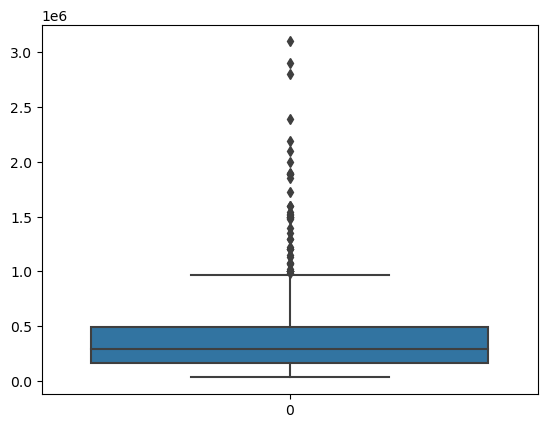

In [136]:
sns.boxplot(df.Price)

C:\Users\91914\AppData\Local\Temp\ipykernel_2932\2699817997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.Price))


<Axes: xlabel='Price', ylabel='Density'>

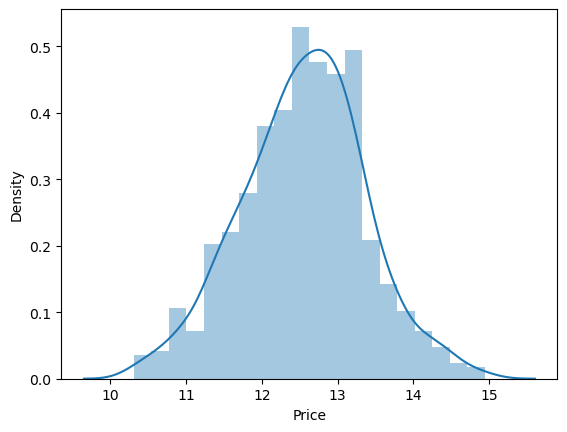

In [138]:
sns.distplot(np.log(df.Price))

In [139]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [140]:
df['price_range'] = ''

In [142]:
df.Price.describe()

count    7.250000e+02
mean     3.925164e+05
std      3.741623e+05
min      3.000000e+04
25%      1.650000e+05
50%      2.900000e+05
75%      4.899990e+05
max      3.100000e+06
Name: Price, dtype: float64

## Problem 1

if price is <= 165000 low price and if it is >165000 and <= 480000 medium price and if it is > 480000 High price

In [144]:
df

,name,company,year,Price,kms_driven,fuel_type,price_range
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel,
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,
4,Ford Figo,Ford,2012,175000,41000,Diesel,
...,...,...,...,...,...,...,...
720,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol,
721,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel,
722,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol,
723,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel,


In [150]:
df.drop('price_range',axis=1,inplace=True)

In [151]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [156]:
# if price is <= 165000 low price and if it is >165000 and <= 480000 medium price and if it is > 480000 High price
price_range = []
for i in df.Price:
    if i<=165000:
        price_range.append('Low Price')
    elif i>165000 and i<=480000:
        price_range.append('Medium Price')
    else:
        price_range.append('High Price')

In [158]:
df['Price_Range'] = price_range

In [159]:
df.head()

,name,company,year,Price,kms_driven,fuel_type,Price_Range
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol,Low Price
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel,Medium Price
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol,Medium Price
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel,High Price
4,Ford Figo,Ford,2012,175000,41000,Diesel,Medium Price


In [157]:
price_range

['Low Price',
 'Medium Price',
 'Medium Price',
 'High Price',
 'Medium Price',
 'Medium Price',
 'High Price',
 'Medium Price',
 'Medium Price',
 'Medium Price',
 'Medium Price',
 'Medium Price',
 'High Price',
 'High Price',
 'Medium Price',
 'Low Price',
 'Medium Price',
 'Low Price',
 'Low Price',
 'Medium Price',
 'Medium Price',
 'Low Price',
 'Medium Price',
 'Medium Price',
 'Medium Price',
 'Medium Price',
 'Low Price',
 'Low Price',
 'High Price',
 'High Price',
 'Medium Price',
 'High Price',
 'High Price',
 'High Price',
 'Medium Price',
 'Medium Price',
 'Medium Price',
 'Medium Price',
 'High Price',
 'Medium Price',
 'Medium Price',
 'High Price',
 'Medium Price',
 'Medium Price',
 'Medium Price',
 'Low Price',
 'Medium Price',
 'High Price',
 'Medium Price',
 'Low Price',
 'High Price',
 'Medium Price',
 'High Price',
 'Low Price',
 'Medium Price',
 'Medium Price',
 'High Price',
 'High Price',
 'High Price',
 'Medium Price',
 'High Price',
 'Medium Price',
 'High Price

In [160]:
df.Price_Range.value_counts()

Medium Price    357
High Price      186
Low Price       182
Name: Price_Range, dtype: int64